# Installs


In [ ]:
!pip install osmnx momepy mapclassify
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 95 kB 2.7 MB/s 
     |████████████████████████████████| 243 kB 23.5 MB/s 
     |████████████████████████████████| 11.2 MB 42.2 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 1.0 MB 45.1 MB/s 
     |████████████████████████████████| 6.3 MB 33.8 MB/s 
     |████████████████████████████████| 1.0 MB 39.5 MB/s 
     |████████████████████████████████| 16.7 MB 266 kB/s 
     |████████████████████████████████| 930 kB 17.2 MB/s 
     |████████████████████████████████| 2.4 MB 40.5 MB/s 
     |████████████████████████████████| 2.1 MB 44.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling m

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.2 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import networkx as nx
import osmnx as ox
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import momepy
%matplotlib inline
import shapely.geometry
import geopandas as gpd
import fiona; fiona.supported_drivers
import json

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 01 Graph Creation

In [ ]:
# Set location 

# Seoul
#location = (37.5666791,126.9782914)
# tokyo 
#location = (35.6828387,139.7594549)
# taipei 
#location = (25.0375198,121.5636796)


# koshigaya
location = (35.9067505,139.7958698684481)

# kichijoji 
#location = (35.7031413, 139.5803077)


# Kyoto
#location = (34.9518969,135.7533071)	
# Bangkok
#location = (13.7525438,100.4934734)
# Hanoi
#location = (21.0294498,105.8544441)

#test
#location = (139.575, 35.685)

In [ ]:
# Download the network from location and distance param
G = ox.graph_from_point(location, dist=20000, dist_type="bbox", network_type="all")

In [ ]:
crs = 4326

In [ ]:
bounding = ox.utils_geo.bbox_from_point(location, dist=19000, project_utm=False, return_crs=True)
area = ox.utils_geo.bbox_to_poly(bounding[0],bounding[1],bounding[2],bounding[3])
area =ox.projection.project_geometry(area, crs=None, to_crs=crs, to_latlong=False)
x, y = area[0].exterior.coords.xy

print(area[0])

POLYGON ((139.58491103548187 35.73587963625635, 140.00682870141435 35.73587963625635, 140.00682870141435 36.07762136374365, 139.58491103548187 36.07762136374365, 139.58491103548187 35.73587963625635))


In [ ]:
# koshigaya 19000 

shapely_polygon = shapely.geometry.Polygon([(139.58491103548187, 35.73587963625635), (140.00682870141435, 35.73587963625635), (140.00682870141435, 36.07762136374365), (139.58491103548187, 36.07762136374365), (139.58491103548187, 35.73587963625635) ])

In [ ]:
# kichijoji 14000 

#shapely_polygon = shapely.geometry.Polygon([(139.4252623094777, 35.57723645303099), (139.7353530905223, 35.57723645303099), (139.7353530905223, 35.829046146969006), (139.4252623094777, 35.829046146969006), (139.4252623094777, 35.57723645303099) ])

In [ ]:
# kichijoji 15000 

#shapely_polygon = shapely.geometry.Polygon([(139.4141876387261, 35.568243249676065), (139.74642776127388, 35.568243249676065), (139.74642776127388, 35.83803935032393), (139.4141876387261, 35.83803935032393), (139.4141876387261, 35.568243249676065) ])

In [ ]:
# kichijoji 20000 

#shapely_polygon = shapely.geometry.Polygon([(139.35881428496813, 35.52327723290142), (139.80180111503185, 35.52327723290142), (139.80180111503185, 35.883005367098576), (139.35881428496813, 35.883005367098576), (139.35881428496813, 35.52327723290142) ])

In [ ]:
# Taipei
#shapely_polygon = shapely.geometry.Polygon([(121.36516089795728, 24.85765573290142), (121.76219830204272, 24.85765573290142), (121.76219830204272, 25.217383867098576), (121.36516089795728, 25.217383867098576), (121.36516089795728, 24.85765573290142) ])

In [ ]:
# kyoto
#shapely_polygon = shapely.geometry.Polygon([(135.53386254375954, 34.772032832901424), (135.97275165624046, 34.772032832901424), (135.97275165624046, 35.13176096709858), (135.53386254375954, 35.13176096709858), (135.53386254375954, 34.772032832901424) ])

In [ ]:
# seoul
#shapely_polygon = shapely.geometry.Polygon([(126.75137491692804, 37.386815032901424), (127.20520788307196, 37.386815032901424), (127.20520788307196, 37.74654316709858),(126.75137491692804, 37.74654316709858),(126.75137491692804, 37.386815032901424) ])

In [ ]:
# tokyo
#shapely_polygon = shapely.geometry.Polygon([(139.53801786084077, 35.50297463290142), (139.98089193915925, 35.50297463290142), (139.98089193915925, 35.862702767098575), (139.53801786084077, 35.862702767098575), (139.53801786084077, 35.50297463290142) ])

In [ ]:
%%script echo
filepath_tag_geojson = '/content/drive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/data/boundingKoshigaya19000.geojson'
with open(filepath_tag_geojson,"w") as f:
    f.write(gpd.GeoSeries([shapely_polygon]).to_json())

In [ ]:
# Reproject to a projected crs (meters)

G_proj = ox.projection.project_graph(G, to_crs=crs)
# Decompose the graph
G_nodes, G_edges = ox.graph_to_gdfs(G_proj)


G_edges = G_edges.loc[:, G_edges.columns.intersection(['geometry'])]

print(G_edges)
G_edges.shape
G_edges.reset_index()

                                                                    geometry
u          v          key                                                   
123335504  277915139  0    LINESTRING (139.90325 35.81720, 139.90334 35.8...
           172311357  0    LINESTRING (139.90325 35.81720, 139.90316 35.8...
           172311308  0    LINESTRING (139.90325 35.81720, 139.90378 35.8...
277915139  277915140  0    LINESTRING (139.90334 35.81753, 139.90492 35.8...
           277915148  0    LINESTRING (139.90334 35.81753, 139.90343 35.8...
...                                                                      ...
9814489680 9814489660 0    LINESTRING (139.83587 35.80467, 139.83601 35.8...
9814489663 9814489664 0    LINESTRING (139.83562 35.80462, 139.83572 35.8...
           9814489680 0    LINESTRING (139.83562 35.80462, 139.83587 35.8...
           9814489679 0    LINESTRING (139.83562 35.80462, 139.83560 35.8...
9814518834 9814518829 0    LINESTRING (139.84434 35.80953, 139.84430 35.8...

,u,v,key,geometry
0,123335504,277915139,0,"LINESTRING (139.90325 35.81720, 139.90334 35.8..."
1,123335504,172311357,0,"LINESTRING (139.90325 35.81720, 139.90316 35.8..."
2,123335504,172311308,0,"LINESTRING (139.90325 35.81720, 139.90378 35.8..."
3,277915139,277915140,0,"LINESTRING (139.90334 35.81753, 139.90492 35.8..."
4,277915139,277915148,0,"LINESTRING (139.90334 35.81753, 139.90343 35.8..."
...,...,...,...,...
1161946,9814489680,9814489660,0,"LINESTRING (139.83587 35.80467, 139.83601 35.8..."
1161947,9814489663,9814489664,0,"LINESTRING (139.83562 35.80462, 139.83572 35.8..."
1161948,9814489663,9814489680,0,"LINESTRING (139.83562 35.80462, 139.83587 35.8..."
1161949,9814489663,9814489679,0,"LINESTRING (139.83562 35.80462, 139.83560 35.8..."


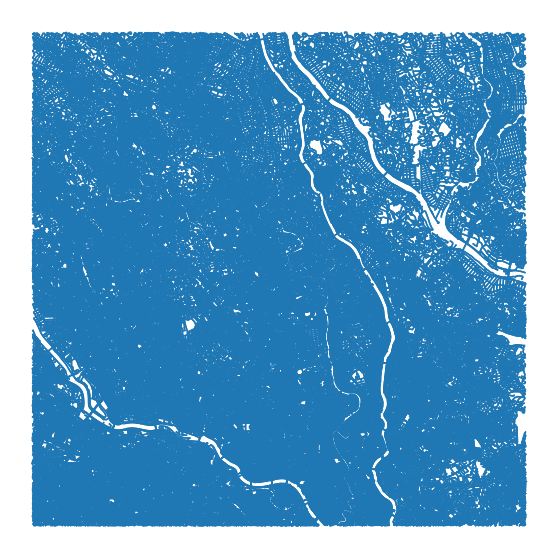

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
G_edges.plot(ax=ax)
ax.set_axis_off()
plt.show()

In [ ]:
%%script echo
filepath_tag_geojson = '/content/drive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/data/tokyographkoshigaya.geojson'
G_edges.to_file(filepath_tag_geojson, driver='GeoJSON')

#02 Street network analysis
Graph analysis offers three modes, of which the first two are used within momepy (as per v0.2): - node-based - value per node - edge-based - value per edge - network-based - single value per network

In [ ]:
streets = ox.graph_to_gdfs(ox.get_undirected(G_proj), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

We can generate a networkX.MultiGraph, which is used within momepy for network analysis, using gdf_to_nx.

## Node-based analysis
Once we have the graph, we can use momepy functions, like the one measuring clustering:

In [ ]:
graph = momepy.gdf_to_nx(streets)

/usr/local/lib/python3.7/dist-packages/momepy/utils.py:228: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_network[length] = gdf_network.geometry.length


In [ ]:
graph = momepy.clustering(graph, name='clustering')

## Using sub-graph
Momepy includes local characters measured on the network within a certain radius from each node, like [meshedness](https://en.wikipedia.org/wiki/Meshedness_coefficient). 


The Meshedness Coefficient, for instance, measures connectivity by looking at the number of cycles in the network with respect to the maximum number of cycles (a cycle is a closed path that begins and ends at the same node with no fewer than three links) ([transportist](https://transportist.org/2016/11/14/elements-of-access-meshedness/))


The function will generate ego_graph for each node so that it might take a while for more extensive networks. Radius can be defined topologically:

In [ ]:
graph = momepy.meshedness(graph, radius=5, name='meshedness')

  0%|          | 0/416360 [00:00<?, ?it/s]

Or metrically, using distance which has been saved as an edge argument by gdf_to_nx (or any other weight).

In [ ]:
nodes = momepy.nx_to_gdf(graph, points=True, lines=False, spatial_weights=False)

/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:239: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/usr/local/lib/python3.7/dist-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


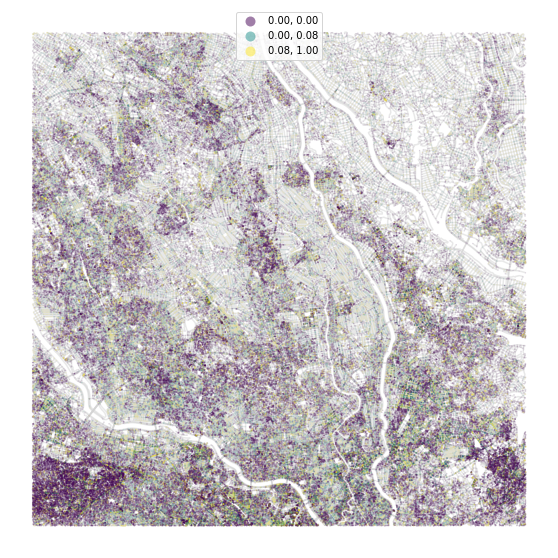

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
nodes.plot(ax=ax, column='clustering', markersize=0.01, legend=True, cmap='viridis',
           scheme='quantiles', alpha=0.5, zorder=2)
streets.plot(ax=ax, color='lightgrey', alpha=0.5, zorder=1)
ax.set_axis_off()
plt.show()